In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# listing image => dapat dir path dari image
# load image => bisa ngeload image
# smoothing image

# feature detection => ada 3 contoh akaze, sift, orb

# feature matching => pakai FLANN dengan Lowe's ratio test 

# draw match 



In [8]:
PATH  = "PoVeKamon/Images/"

In [ ]:
# Object 
object = cv2.imread(PATH + "Object.png")
# convert color terlebih dahulu ke RGB
object = cv2.cvtColor(object, cv2.COLOR_BGR2RGB) 


In [10]:
# Data

DATA_PATH = PATH + "Data/"
# data nya terlalu banuak sehingga datanya dimasukkan ke dalam array 



data = []


for image_path in os.listdir(DATA_PATH):
    image_path = DATA_PATH + image_path
    image_data = cv2.imread(image_path)
    data.append(image_data)
print(data)

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [11]:
# Preprocessing

gray_object = cv2.cvtColor(object, cv2.COLOR_RGB2GRAY) # Grayscale gambar
gray_object = cv2.equalizeHist(gray_object) # Histogram Equalization

# Verse 1 - Median blur
gray_object = cv2.medianBlur(gray_object, 5)

# Verse 2 - Gaussian Blur
# gray_object = cv2.GaussianBlur(gray_object, (3,3), 0)

In [12]:
# Feature Detection | Tergantung soalnya nanti pakai yang mana

akaze = cv2.AKAZE_create()
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

In [ ]:
# Keypoint dan Descriptor => itu kalau di soal ada titik titiknya 
# mennghasilkan dua jenis bagian, yaitu keypoint dan descriptor 
object_keypoint, object_descriptor = akaze.detectAndCompute(gray_object, None)

# karena hanya menerima float untuk object descriptor sehingga perlu diubah menjadi float 
object_descriptor = np.float32(object_descriptor)

In [17]:
best_matches = 0

for index, img in enumerate(data):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert ke RGB
    gray_data = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # preprocessing (convert ke grayscale)
    gray_data = cv2.equalizeHist(gray_data) # Equalize Hist
    
    # Verse 1 - Median blur
    gray_data = cv2.medianBlur(gray_data, 5)

    # Verse 2 - Gaussian Blur
    # gray_data = cv2.GaussianBlur(gray_data, (3,3), 0)
    
    data_keypoint, data_descriptor = akaze.detectAndCompute(gray_data, None)
    
    data_descriptor = np.float32(data_descriptor)
    
    # check itu check berapa kali, semakin banyak semakin lama
    # di FlannBasedMatcher itu ada indeks param dan search param 
    flann = cv2.FlannBasedMatcher(dict(algorithm = 1), dict(checks = 50))
    
    # untuk cek kecocokan untuk saat ini menggunakan knn
    # knnMatch itu ada queryDescriptor dan trainDescriptor 
    match = flann.knnMatch(object_descriptor, data_descriptor, 2) # kasih 2 match jadi ada titik kanan dan titik kiri 
    
    # di match itu akan menghasilkan banyak titik, sehingga menerapkan Lowe's theory sehingga semua titik tidak akan diambil
    
    # dibuat 2d array kosong
    
    #mask untuk menyimpan match yang valid
    matchesmask = [[0,0] for _ in range(len(match))]
    
    # compare berapa titik yang cocok, menghitung titik titik mana saja yang bisa dimasukkan
    current_matches = 0
    
    for i, (fm, sm) in enumerate(match):
        if fm.distance < 0.7 * sm.distance:
            matchesmask[i] = [1,0] # tandai sebagai match yang bagus
            current_matches += 1
    
    if best_matches < current_matches:
        best_matches = current_matches
        best_match_data = { # data yang bakal ditampilkan nanti 
            "image_data":img,
            "keypoint":data_keypoint,
            "descriptor": data_descriptor,
            "match": match,
            "matchesmask": matchesmask
        }
            
    

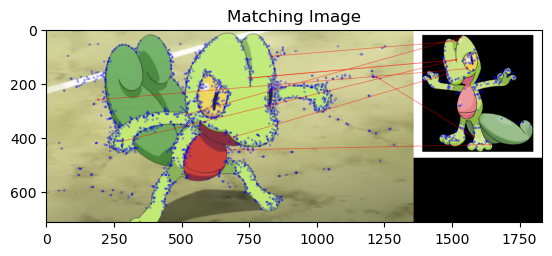

In [18]:
# Result

# Draw

result = cv2.drawMatchesKnn(
    object,
    object_keypoint,
    best_match_data["image_data"],
    best_match_data["keypoint"],
    best_match_data["match"],
    None,
    matchesMask= best_match_data["matchesmask"],
    matchColor=[255, 0, 0],
    singlePointColor=[0, 0, 255]
)

# Show Image
plt.figure()
plt.imshow(result)
plt.title("Matching Image")
plt.show()